# cse-221710309021-Ramani

## Read the dataset from the below URL: https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/amazon_jobs_dataset.csv


In [7]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [8]:
# reading the dataset
data=pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/amazon_jobs_dataset.csv")
data

,Unnamed: 0,Title,location,Posting_date,DESCRIPTION,BASIC QUALIFICATIONS,PREFERRED QUALIFICATIONS
0,0,Software Development Manager,"US, WA, Seattle","March 1, 2018",You are an experienced hands-on manager with a...,· Proven track record of hiring and managing h...,· Experience building extremely high volume an...
1,1,Software Development Engineer,"IN, KA, Bangalore","March 1, 2018",Amazon is driven by being “the world’s most cu...,· Bachelor’s Degree in Computer Science or rel...,· Experience building complex software systems...
2,2,Software Development Engineer,"IN, KA, Bangalore","March 1, 2018",Amazon is driven by being “the world’s most cu...,· Bachelor’s Degree in Computer Science or rel...,· Experience building complex software systems...
3,3,Software Development Engineer - Amazon Lex,"US, WA, Seattle","March 1, 2018",Have you ever wondered what it takes to build ...,· Bachelors Degree in Computer Science or a re...,· Masters or PhD in Computer Science· Experien...
4,4,Software Development Engineer - Amazon Lex,"US, WA, Seattle","March 1, 2018",Have you ever wondered what it takes to build ...,· Bachelors Degree in Computer Science or a re...,· Masters or PhD in Computer Science· Experien...
...,...,...,...,...,...,...,...
3488,3488,Software Engineer,"US, NV, Las Vegas","August 29, 2012",What are you currently doing? We’re building a...,· 5+ years production Java software developmen...,· 7+ years Java software development in a prod...
3489,3489,Software Development Engineer,"US, WA, Seattle","April 23, 2012",At Amazon Voice and Advanced Natural Shopping ...,* Bachelor’s Degree in Computer Science or rel...,* Experience building complex software systems...
3490,3490,Software Development Engineer III - Mar. BR 2012,"US, WA, Seattle","March 6, 2012",Employer: Amazon Corporate LLCPosition: Softwa...,Basic Qualifications:Education: Master’s degre...,-
3491,3491,Software Development Engineer in Test II - IMM546,"US, WA, Seattle","November 28, 2011",POSITIONS AVAILABLECompany: Amazon Corporate L...,-,-


## List of programming languages and technologies: 
#### languages_list = ['swift','matlab','mongodb','hadoop','cosmos', 'mysql','spark', 'pig', 'python', 'java', 'c++', 'php',  'javascript', 'objectivec', 'ruby', 'perl','c','c#']


## 1.What programming languages and technologies are required at Amazon from the above list?(using BASIC QUALIFICATIONS and PREFERRED QUALIFICATIONS columns)

In [9]:
qualifications = data['BASIC QUALIFICATIONS'].tolist()+data['PREFERRED QUALIFICATIONS'].tolist()
qualifications_string = "".join(re.sub('[·,-/’()]', '', str(v)) for v in qualifications).lower()

In [11]:
languages_list = ['swift','matlab','mongodb','hadoop','cosmos', 'mysql','spark', 'pig', 'python', 'java', 'c++', 'php', 'javascript', 'objectivec', 'ruby', 'perl','c','c#']

In [12]:
wordcount = dict((x,0) for x in languages_list)
for w in re.findall(r"[[\w'+#-]+|[.!?;’]", qualifications_string):
    if w in wordcount:
        wordcount[w] += 1
# print
print(wordcount)

C:\Users\SATYA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Possible nested set at position 1
  


{'swift': 56, 'matlab': 24, 'mongodb': 19, 'hadoop': 219, 'cosmos': 1, 'mysql': 74, 'spark': 148, 'pig': 13, 'python': 1187, 'java': 3065, 'c++': 1892, 'php': 60, 'javascript': 832, 'objectivec': 55, 'ruby': 570, 'perl': 529, 'c': 1010, 'c#': 991}


In [13]:
programming_language_popularity = sorted(wordcount.items(), key=lambda kv: kv[1], reverse=True)

In [14]:
df_popular_programming_lang = pd.DataFrame(programming_language_popularity,columns=['Language','Popularity'])
df_popular_programming_lang['Language'] = df_popular_programming_lang.Language.str.capitalize()
df_popular_programming_lang = df_popular_programming_lang[::-1]

In [15]:
df_popular_programming_lang


,Language,Popularity
17,Cosmos,1
16,Pig,13
15,Mongodb,19
14,Matlab,24
13,Objectivec,55
12,Swift,56
11,Php,60
10,Mysql,74
9,Spark,148
8,Hadoop,219


## 2.Programming Languages Popularity at Amazon: Extract the count of each programming language and visualize it through a bar plot
- [ On X Axis→ Programming languages ]
- [ On Y-axis→ Frequency of Programming Languages]


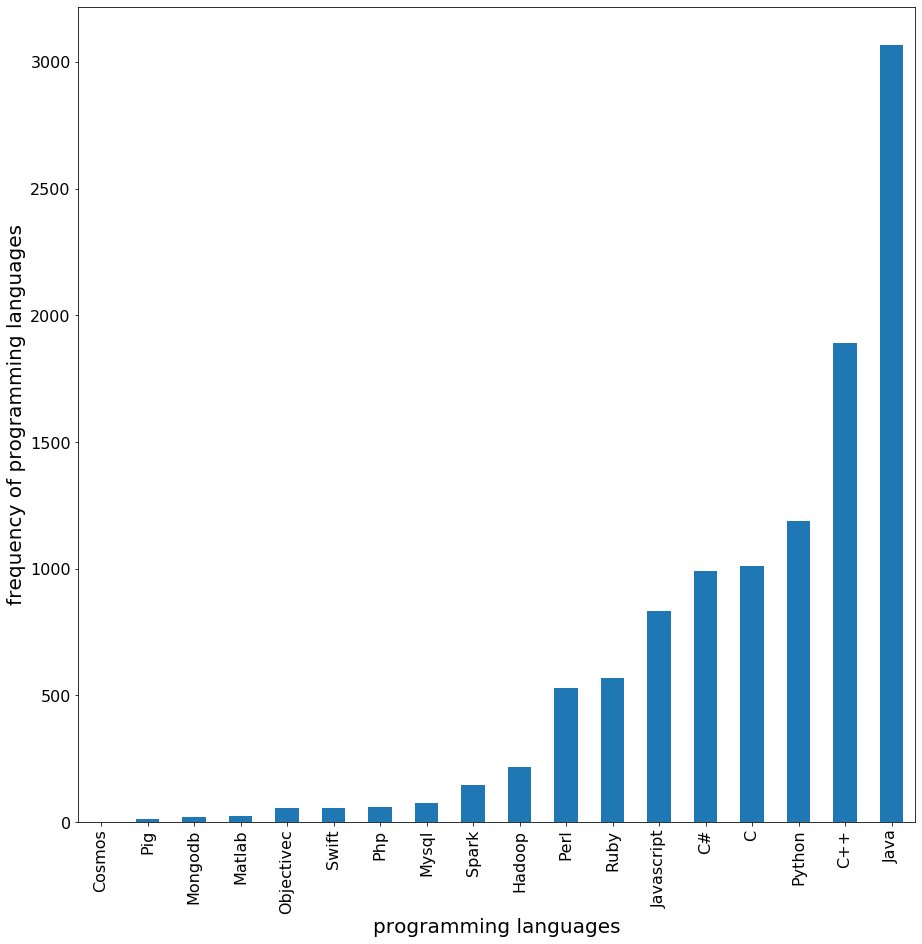

In [38]:
df_popular_programming_lang.plot.bar(x='Language',y='Popularity',figsize=(15,15), legend=False)

plt.xlabel('programming languages',fontsize=20)
plt.ylabel('frequency of programming languages',fontsize=20)


plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

## 3.Visualize the job locations through a plot.(Consider only the locations which are repeating more than 10 times)


In [23]:
threshold = 10
location_value_counts = data.location.value_counts()
to_remove = location_value_counts[location_value_counts <= threshold].index
data['location'].replace(to_remove, np.nan, inplace=True)
location_value_counts =data.location.value_counts()
location_value_counts = location_value_counts[::-1]

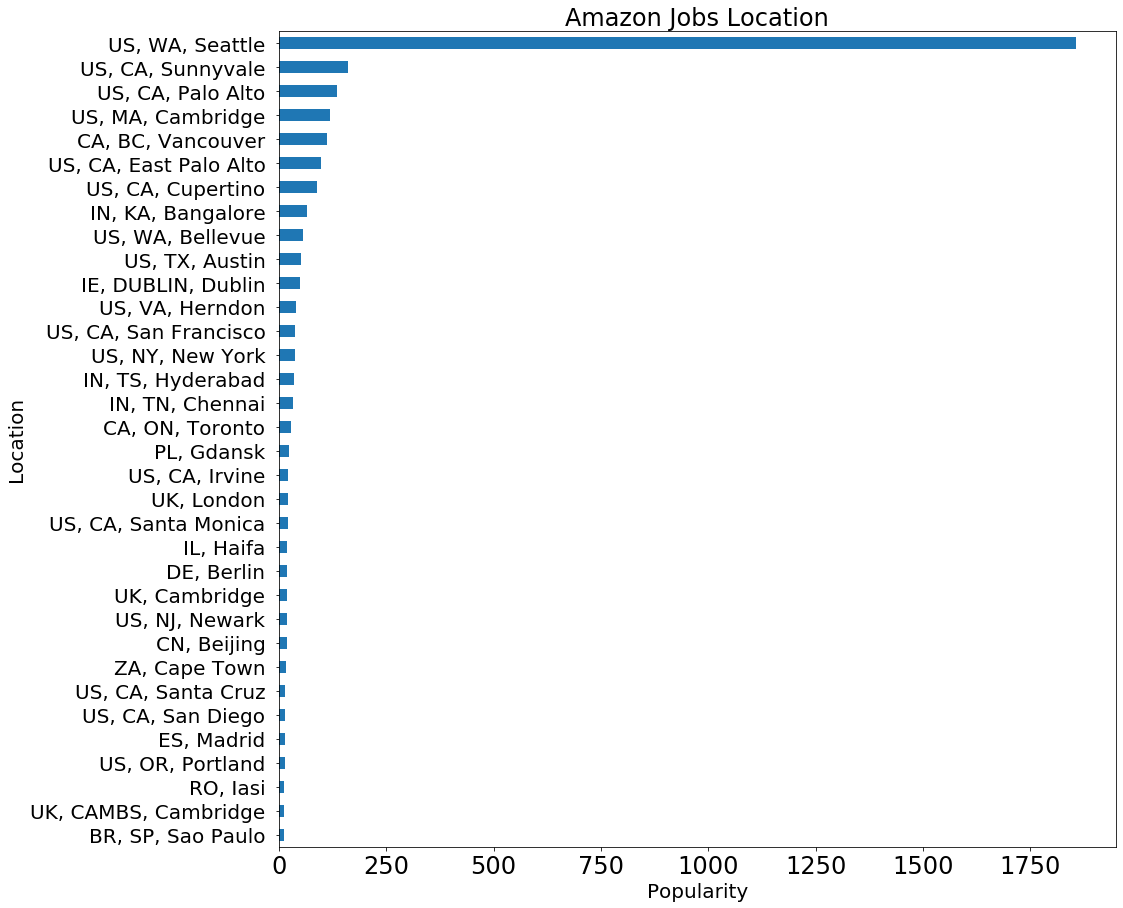

In [24]:
location_value_counts.plot.barh(figsize=(15, 15))

plt.title("Amazon Jobs Location", fontsize=24)

plt.xlabel("Popularity", fontsize=20)
plt.ylabel("Location",fontsize=20)

plt.xticks(fontsize=24)
plt.yticks(fontsize=20)

plt.show()

## 4.degree_list = ["BA", "BS", "Bachelor's", "PhD","MS","Master's"]
## Popularity of Academic Degree at Amazon : Which degrees are most asked at Amazon from the above degree_list?
### Make a plot to visualize Degree and its Popularity


In [26]:
basic_qualifications_string = "".join(re.sub('[·,-/’()]', '', str(v)) for v in qualifications)

In [27]:
degree_list = ["BA", "BS", "Bachelor's", "PhD","MS","Master's"]

In [28]:
wordcount = dict((x,0) for x in degree_list)
for w in re.findall(r"[\w']+|[.,!?;’]", basic_qualifications_string):
    if w in wordcount:
        wordcount[w] += 1
print(wordcount)

{'BA': 2, 'BS': 524, "Bachelor's": 947, 'PhD': 489, 'MS': 433, "Master's": 417}


In [29]:
degree_wanted = sorted(wordcount.items(), key=lambda kv: kv[1], reverse=True)

In [30]:
df_degree_popular = pd.DataFrame(degree_wanted,columns=['Degree','Popularity'])

df_degree_popular

,Degree,Popularity
0,Bachelor's,947
1,BS,524
2,PhD,489
3,MS,433
4,Master's,417
5,BA,2


In [31]:
num=list([('Bachelor of Science',1471),('Master of Science',850),('PhD',489),('BA',2)])
df_degree_popular = pd.DataFrame(num,columns=['Degree','Popularity'])
df_degree_popular


,Degree,Popularity
0,Bachelor of Science,1471
1,Master of Science,850
2,PhD,489
3,BA,2


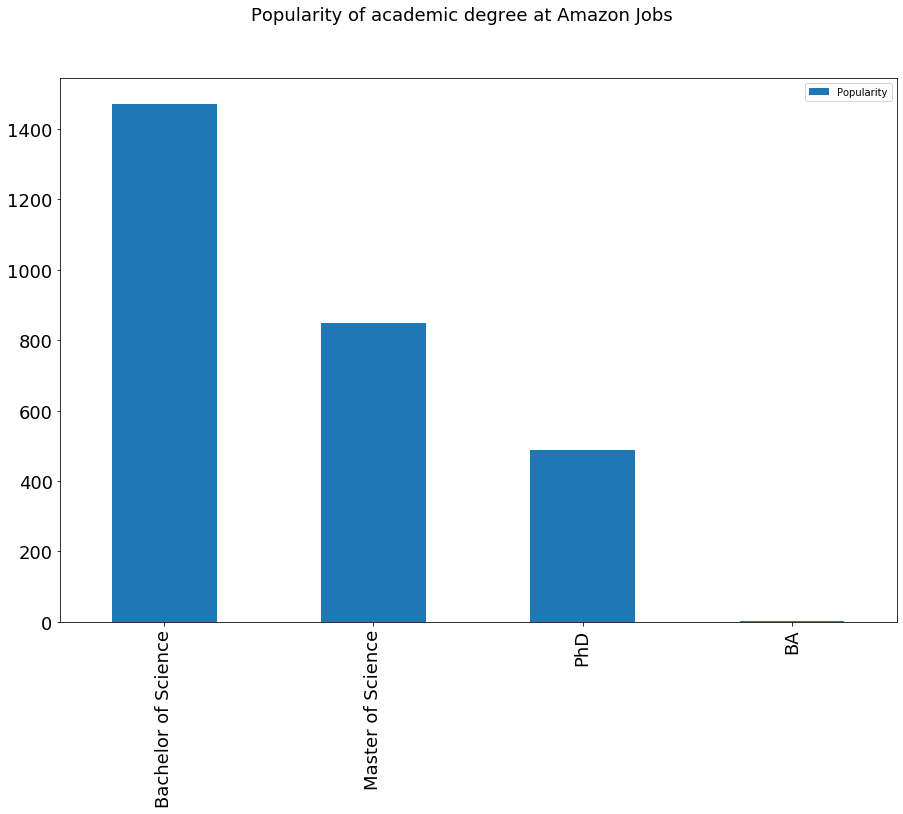

In [33]:
df_degree_popular = df_degree_popular[::-1] 

df_degree_popular.plot.bar(x='Degree',y='Popularity',figsize=(15,10), stacked=True)

plt.suptitle("Popularity of academic degree at Amazon Jobs ", fontsize=18)

plt.xlabel("")

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.show()